# COGS 108 - Data Checkpoint

# Names

- Derrick Nguyen
- Amelia Lei
- Eunice Cho
- Samantha Lin

# Research Question

How do factors such as employment length, income, and loan amount affect loan approval rates for young adults (ages 18-28) who recently graduated with different educational levels (high school diploma, bachelor's degree, or master’s/PhD)? How do these effects compare to mid-career adults (over age 28) with similar educational backgrounds?

## Background and Prior Work

As young college students nearing graduation, understanding loan approval factors is highly relevant to us as we prepare to navigate personal finance and credit. Many young adults, including ourselves, may soon be considering loans, whether for further education, purchasing a car, or other personal investments. Having a clear grasp of the variables that impact loan approvals—such as income, employment length, and debt-to-income ratio—can empower us and others in our age group to make better financial decisions and improve our creditworthiness. This research seeks insights into how employment length, income, and loan amount impact approval likelihoods for young adults (ages 20-24) versus those over 24, highlighting any disparities across age groups. The dataset we chose allows us to analyze these financial factors in depth, aiming to provide actionable insights for young adults interested in securing credit and managing loans more effectively as they start their careers.

According to the Consumer Financial Protection Bureau, lenders are prohibited from accepting or denying a loan application solely based on age <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). However, they are allowed to assess an individual’s age in relation to other factors such as job stability to evaluate the sustainability of the loan. We want to look at which factor or combination of factors in relation to age have the most significant impact on a lender’s decision making. 

This project by Lim Chia Hooi was a loan-approval prediction project that looks to classify whether or not a person will be approved for loans based on their info (applicant income, Coapplicant income, loan amount, loan amount term, credit history, and loan status), and we faced the same question wondering what and how each attribute contributes to the decision of whether or not a loan will be approved  <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). In this project’s exploratory analysis section, they’ve found that there seems to be a correlation between applicant income and loan amount and credit history and loan status . In addition to that, they’ve also found that people with credit history are more likely to be approved for a loan.

In another research paper comparing machine learning model methods for loan approval predictions, they found that K-Best and RFE (Recursive Feature Selection) worked best at improving the accuracy of loan prediction models <a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). They also conducted an exploratory data analysis and found that factors such as education level, gender, and marital status were also contributing factors to loan approvals. 

References:
1. <a name="cite_note-1"></a> [^](#cite_ref-1) Consumer Financial Protection Bureau (18 Aug 2022) Is a lender allowed to consider my age or where my income comes from when deciding whether to give me a loan?. *Consumer Financial Protection Bureau*. https://www.consumerfinance.gov/ask-cfpb/is-a-lender-allowed-to-consider-my-age-or-where-my-income-comes-from-when-deciding-whether-to-give-me-a-loan-en-1181/

2. <a name="cite_note-1"></a> [^](#cite_ref-1) limchiahooi (26 Dec 2018) Loan Approval Prediction. *GitHub*. https://github.com/limchiahooi/loan-approval-prediction/blob/master/loan-approval-prediction.ipynb

3. <a name="cite_note-1"></a> [^](#cite_ref-1) Sinap, Vahid. (30 Apr 2024) A Comparative Study of Loan Approval Prediction Using Machine Learning
Methods. *Gazi University - Journal of Science Part C: Design and Technology*. https://dergipark.org.tr/tr/download/article-file/3808895


# Hypothesis


We predict that young adults (ages 18-28) who recently graduated with higher educational levels (master’s/PhD) are more likely to be approved for home mortage loans compared to those with only a high school diploma or bachelor's degree, as higher education often correlates with higher income potential and job stability. However, mid-career adults (over age 24) with similar educational backgrounds may experience higher loan approval rates overall due to longer employment lengths (4 years or more) and type of employemnt (full-time, unemployed, self-employed, and part-time).

# Data

## Dataset Overview
  - Dataset Name: Loan Default Prediction Dataset
  - Link to the dataset: https://www.kaggle.com/datasets/nikhil1e9/loan-default
  - Number of observations: 255347
  - Number of variables: 18

Our ideal dataset would have the following variables: 
- Age (The age of the borrower) - Int
- Income (The annual income of the borrower) - Int 
- LoanAmount (The amount of money being borrowed) - Int 
- MonthsEmployed (The number of months the borrower has been employed) - Int
- Education (The highest level of education attained by the borrower (PhD, Master's, Bachelor's, High School)) - String
- EmploymentType (The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed)) - String
- LoanPurpose (The purpose of the loan (Home, Auto, Education, Business, Other)) - String
- Default (The binary target variable indicating whether the loan defaulted (1) or not (0)) - Int

Age would be a proxy for life stage and income potential. Income would be a proxy for indicating financial stability and ability to repay. Loan amount would be a proxy for affordability and risk. Months employed woud be a proxy for job stability and likelihood of continued income. Education owuld be a rpoxy for employability and earning potential. Employment type would be a proxy for income predictability. Loan purpose would be a proxy for risk. There should be at least 10,000 observations to have less bias and variability. This data would be collected on adults over the age of 18. There should be a significant amount of observations for those in the age range 18-28 as well as 28+. This data would be collected off of Kaggle. The data would be stored in a CSV file to make it convenient for creating a dataframe using pandas. 

First, we need to drop any columns in the dataset that we do not need for our analysis. For the Age and Income column we might need to do a histogram to see if there are any outliers, and if we do, we need to delete those observation from the dataframe. For the MonthsEmployed column we need to make sure that all observations in this column is in the unit of months, and if we find something that isn't looking right we will need to convert it to months. For the Education, EmploymentType, LoanPurpose columns we can make sure to check for typos and fix them accordingly. For the default column, we need to check that all values are either 1 or 0. Overall, we will also be looking for missing values, and we will be removing them or filling them in depending on other relevent context.

## Loan Default Prediction Dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loans = pd.read_csv('Loan_default.csv')

In [41]:
loans = loans.drop(columns = ['CreditScore', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'HasCoSigner'])

In [ ]:
for i in loans.columns:
    print(f'{i} type: {loans[i].dtypes}')

LoanID type: object
Age type: int64
Income type: int64
LoanAmount type: int64
MonthsEmployed type: int64
Education type: object
EmploymentType type: object
LoanPurpose type: object
Default type: int64


In [51]:
loans.describe()

,Age,Income,LoanAmount,MonthsEmployed,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,59.541976,0.116128
std,14.990258,38963.013729,70840.706142,34.643376,0.320379
min,18.000000,15000.000000,5000.000000,0.000000,0.000000
25%,31.000000,48825.500000,66156.000000,30.000000,0.000000
50%,43.000000,82466.000000,127556.000000,60.000000,0.000000
75%,56.000000,116219.000000,188985.000000,90.000000,0.000000
max,69.000000,149999.000000,249999.000000,119.000000,1.000000


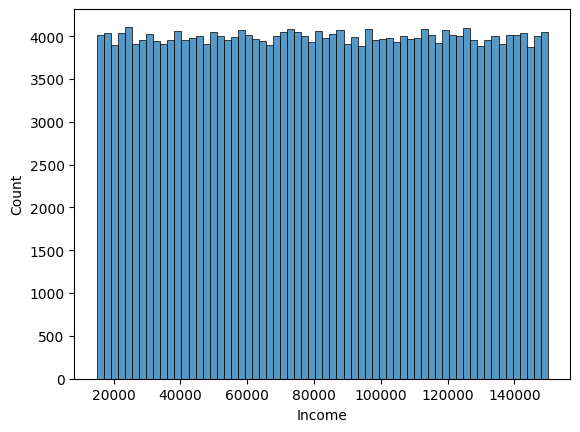

In [52]:
sns.histplot(data=loans, x='Income')
plt.show()

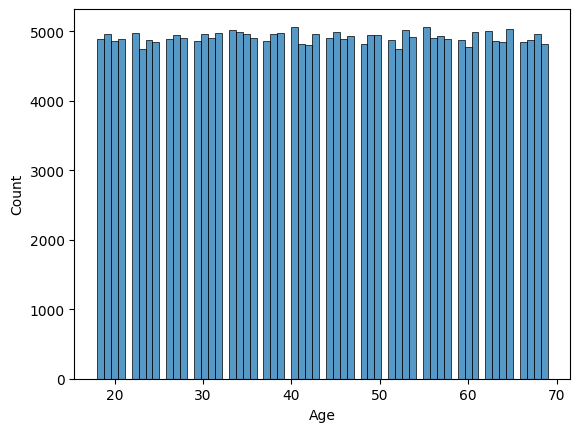

In [53]:
sns.histplot(data=loans, x='Age')
plt.show()

In [54]:
loans['MonthsEmployed'].unique()

array([ 80,  15,  26,   0,   8,  18,  67,  83, 114,  94,  56,  87, 112,
        31,  49, 106, 119,  65,  96,  55,  48,  73, 110,  58,  62,  16,
        57,  37,   6, 103,  39,  51,  24, 105,  47, 117,  32,  99,  84,
        72,  88,  27,  36,  33,  59,  20,  54,  76,  66,  11,  23,  22,
        93,  35,  50,  69,  70, 111,  63,   9,   1,  44,  25,  71, 101,
        53,  45,  91,  52,  74,  86,   4,  10,  82,   7,  79,  85,  12,
        17,  28,  68, 100,  60, 115,  43,  14,  13, 104,  95, 118, 113,
        97, 108,  40,  77, 109,  34,  41,  92,  46,   2,   3,  78, 116,
        89,  75,  81,   5,  90, 107,  98,  21,  64,  29,  30,  19,  38,
        61,  42, 102])

In [55]:
loans['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [56]:
loans['LoanPurpose'].unique()

array(['Other', 'Auto', 'Business', 'Home', 'Education'], dtype=object)

In [57]:
loans['EmploymentType'].unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [58]:
loans['Default'].unique()

array([0, 1])

In [59]:
loans.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
MonthsEmployed    0
Education         0
EmploymentType    0
LoanPurpose       0
Default           0
dtype: int64

# Ethics & Privacy

We need to consider the privacy of individuals in our dataset because we have access to sensitive information such as their age, employment status, gender, credit history, income, and marital status. Additional columns that we have access to provide details including months employed, number of credit lines, education level, and employment type. These variables are crucial for a data analysis but they may raise privacy concerns as they contain personal information. The LoanID column anonmyizes the individuals identity to ensure privacy. This allows us to make meaningful analysis without threatening the individuals privacy. Our data lacks geographical data which means it does not account for the socioeconomic differences across regions. The absence of this could unequally represent people from different socioeconomic backgrounds. This is a limitation that we will keep in mind in our analysis. The results of our analysis could impact students by providing insights into the factors that affect loan approval and qualification. For instance, it may be revealed that younger borrowers with less work experience or lower incomes are at a higher risk of loan rejection, which could guide them on improving their profiles. In addition, financial institutions may use our findings to refine their loan approval criteria. By identifying which factors (income, credit history, months employed) are strong predictors of loan default, they can better assess risk and make more informed lending decisions. As we are unsure of the exact data collection methods, there may be biases that influence who is included in the dataset. For example, individuals with poor credit history or unconventional employment types might be underrepresented. We will acknowledge the potential for selection bias in our analysis and discuss its possible effects on the results. This allows stakeholders to interpret the findings with caution, understanding that the dataset might not fully reflect the diversity of loan applicants and where possible, we will segment the data by relevant categories (e.g., age groups, income levels, education levels) to assess if certain groups are disproportionately affected by the bias.

# Team Expectations 

* We will be using Discord for our communication
* We should meet once a week to work on our project virtually
* Our tone should be calm and polite when dicussing things
* Our decision making of the project will be a majority vote
* Everyone will do a little bit of every part of the project
* Tasks will be assigned to people through communication on Discord and working on the project once a week virtually
* We will be using the project timeline proposal as the plan for deadlines
* If a person is struggling, they should ask the group as soon as possible and everyone should try to help
* The person should contact the group through Discord

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 10/13  |  7 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 10/21  |  7 PM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 10/29  | 7 PM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 11/7  | 7 PM  | Import & Wrangle Data; EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 11/21  | 7 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete project check-in |
| 12/5  | 7 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 12/10  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |